In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [143]:
result_tket = pd.read_csv('./results/result_uccsd_tket.csv')
result_paulihedral = pd.read_csv('./results/result_uccsd_paulihedral.csv')
result_tetris = pd.read_csv('./results/result_uccsd_tetris.csv')
result_phoenix = pd.read_csv('./results/result_uccsd_phoenix.csv')


In [144]:
num_programs = len(result_tket)
programs = result_tket['program']
num_2q_gates = result_tket['num_2q_gates']
depth_2q = result_tket['depth_2q']

In [145]:
result_phoenix

,program,num_qubits,num_gates,num_2q_gates,depth,depth_2q,num_gates(all2all),num_2q_gates(all2all),depth(all2all),depth_2q(all2all),...,depth(all2all_opt),depth_2q(all2all_opt),num_gates(manhattan),num_2q_gates(manhattan),depth(manhattan),depth_2q(manhattan),num_gates(sycamore),num_2q_gates(sycamore),depth(sycamore),depth_2q(sycamore)
0,CH2_cmplt_BK,14,37780,19574,23568,19399,6127,4112,4409,3483,...,5563,3253,19391,12546,11660,8680,14449,8710,8964,6336
1,CH2_cmplt_JW,14,34280,21072,23700,19749,6030,4150,4448,3636,...,5296,3040,18344,10953,11121,8005,14874,8420,9262,6353
2,CH2_frz_BK,12,19880,10228,12559,10174,3374,2214,2445,1909,...,3058,1804,9982,6217,6113,4473,7637,4544,4929,3485
3,CH2_frz_JW,12,17658,10344,11914,9706,3258,2202,2438,1973,...,2958,1683,9471,5382,5849,4100,7843,4465,4960,3446
4,H2O_cmplt_BK,14,25238,13108,15797,12976,4230,2810,3050,2406,...,3765,2216,12499,8129,7632,5693,9489,5710,6048,4276
5,H2O_cmplt_JW,14,23210,14360,16264,13576,4090,2808,3082,2514,...,3642,2085,12253,7312,7275,5265,9850,5624,6278,4312
6,H2O_frz_BK,12,15624,8004,9691,7934,2205,1418,1559,1195,...,2014,1137,6301,3737,4038,2872,5011,2871,3282,2273
7,H2O_frz_JW,12,13704,8064,9332,7613,2568,1740,1927,1564,...,2324,1326,7656,4410,4853,3454,6087,3462,3867,2671
8,LiH_cmplt_BK,12,16762,8680,10509,8637,2283,1484,1646,1285,...,2181,1218,6621,4000,4215,3049,5041,2895,3337,2305
9,LiH_cmplt_JW,12,13700,8064,9342,7616,2526,1702,1901,1535,...,2302,1305,7368,4318,4566,3275,5987,3317,3817,2603


In [146]:
def geometric_mean(arr):
    return np.exp(np.mean(np.log(arr)))

### All2all topology

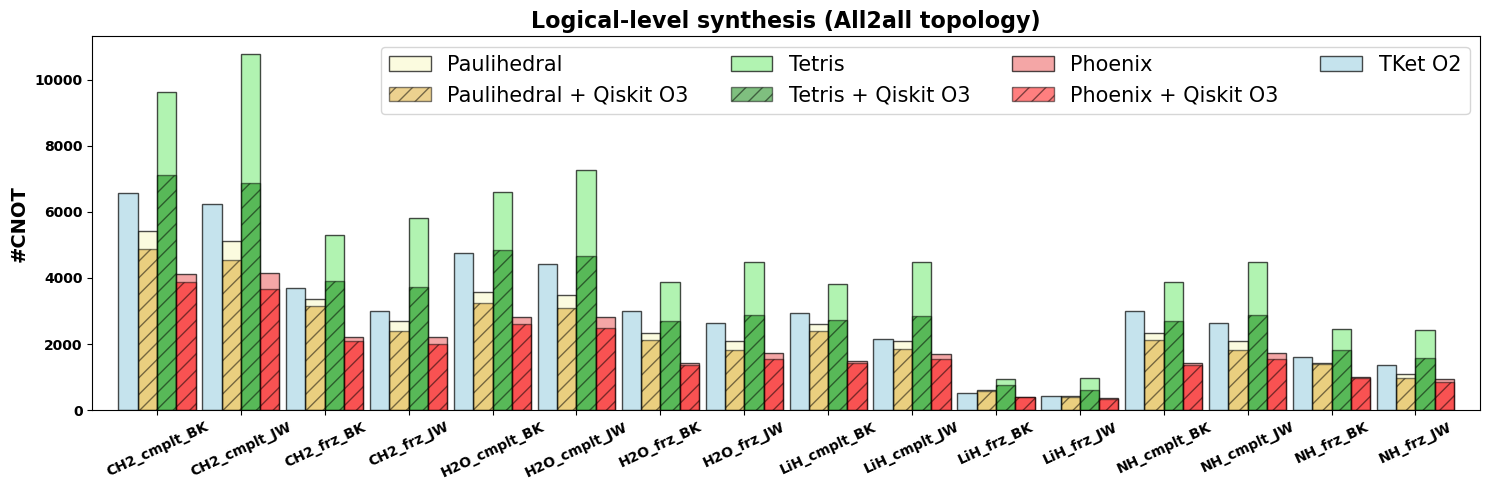

In [147]:
# num_2q_gates
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(all2all)'], width=width, label='Paulihedral', edgecolor='black', color='lightgoldenrodyellow', alpha=0.7)
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(all2all_opt)'], width=width, label='Paulihedral + Qiskit O3', edgecolor='black', color='goldenrod', alpha=0.5, hatch='//')

plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(all2all)'], width=width, label='Tetris', edgecolor='black', color='lightgreen', alpha=0.7)
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(all2all_opt)'], width=width, label='Tetris + Qiskit O3', edgecolor='black', color='green', alpha=0.5, hatch='//')

plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(all2all)'], width=width, label='Phoenix', edgecolor='black', color='lightcoral', alpha=0.7)
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(all2all_opt)'], width=width, label='Phoenix + Qiskit O3', edgecolor='black', color='red', alpha=0.5, hatch='//')

plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(all2all)'], width=width, label='TKet O2', edgecolor='black', color='lightblue', alpha=0.7)

plt.xticks(np.arange(num_programs), programs, rotation=25, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=15, loc='upper right', ncol=4)
plt.title('Logical-level synthesis (All2all topology)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [131]:
print('optimization rate (TKet)', geometric_mean(result_tket['num_2q_gates(all2all)'] / result_tket['num_2q_gates']).round(4))
print('optimization rate (Paulihedral)', geometric_mean(result_paulihedral['num_2q_gates(all2all)'] / result_paulihedral['num_2q_gates']).round(4))
print('optimization rate (Paulihedral + Qiskit O3)', geometric_mean(result_paulihedral['num_2q_gates(all2all_opt)'] / result_paulihedral['num_2q_gates']).round(4))
print('optimization rate (Tetris)', geometric_mean(result_tetris['num_2q_gates(all2all)'] / result_tetris['num_2q_gates']).round(4))
print('optimization rate (Tetris + Qiskit O3)', geometric_mean(result_tetris['num_2q_gates(all2all_opt)'] / result_tetris['num_2q_gates']).round(4))
print('optimiozation rate (Phoenix)', geometric_mean(result_phoenix['num_2q_gates(all2all)'] / result_phoenix['num_2q_gates']).round(4))
print('optimization rate (Phoenix + Qiskit O3)', geometric_mean(result_phoenix['num_2q_gates(all2all_opt)'] / result_phoenix['num_2q_gates']).round(4))

optimization rate (TKet) 0.3307
optimization rate (Paulihedral) 0.2841
optimization rate (Paulihedral + Qiskit O3) 0.2572
optimization rate (Tetris) 0.5366
optimization rate (Tetris + Qiskit O3) 0.3673
optimiozation rate (Phoenix) 0.2115
optimization rate (Phoenix + Qiskit O3) 0.1956


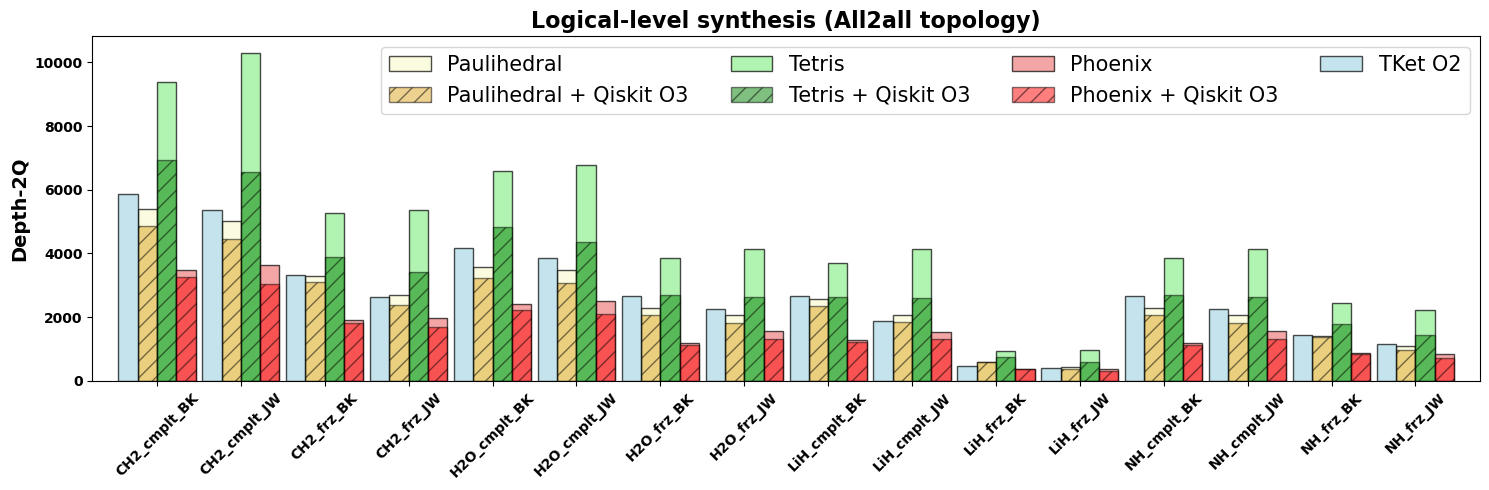

In [95]:
# depth_2q
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(all2all)'], width=width, label='Paulihedral', edgecolor='black', color='lightgoldenrodyellow', alpha=0.7)
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(all2all_opt)'], width=width, label='Paulihedral + Qiskit O3', edgecolor='black', color='goldenrod', alpha=0.5, hatch='//')

plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(all2all)'], width=width, label='Tetris', edgecolor='black', color='lightgreen', alpha=0.7)
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(all2all_opt)'], width=width, label='Tetris + Qiskit O3', edgecolor='black', color='green', alpha=0.5, hatch='//')

plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(all2all)'], width=width, label='Phoenix', edgecolor='black', color='lightcoral', alpha=0.7)
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(all2all_opt)'], width=width, label='Phoenix + Qiskit O3', edgecolor='black', color='red', alpha=0.5, hatch='//')

plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(all2all)'], width=width, label='TKet O2', edgecolor='black', color='lightblue', alpha=0.7)

plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=15, loc='upper right', ncol=4)
plt.title('Logical-level synthesis (All2all topology)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [132]:
print('optimization rate (TKet)', geometric_mean(result_tket['depth_2q(all2all)'] / result_tket['depth_2q']).round(4))
print('optimization rate (Paulihedral)', geometric_mean(result_paulihedral['depth_2q(all2all)'] / result_paulihedral['depth_2q']).round(4))
print('optimization rate (Paulihedral + Qiskit O3)', geometric_mean(result_paulihedral['depth_2q(all2all_opt)'] / result_paulihedral['depth_2q']).round(4))
print('optimization rate (Tetris)', geometric_mean(result_tetris['depth_2q(all2all)'] / result_tetris['depth_2q']).round(4))
print('optimization rate (Tetris + Qiskit O3)', geometric_mean(result_tetris['depth_2q(all2all_opt)'] / result_tetris['depth_2q']).round(4))
print('optimiozation rate (Phoenix)', geometric_mean(result_phoenix['depth_2q(all2all)'] / result_phoenix['depth_2q']).round(4))
print('optimization rate (Phoenix + Qiskit O3)', geometric_mean(result_phoenix['depth_2q(all2all_opt)'] / result_phoenix['depth_2q']).round(4))

optimization rate (TKet) 0.3014
optimization rate (Paulihedral) 0.2907
optimization rate (Paulihedral + Qiskit O3) 0.263
optimization rate (Tetris) 0.5326
optimization rate (Tetris + Qiskit O3) 0.3637
optimiozation rate (Phoenix) 0.1928
optimization rate (Phoenix + Qiskit O3) 0.1729


### Manhattan

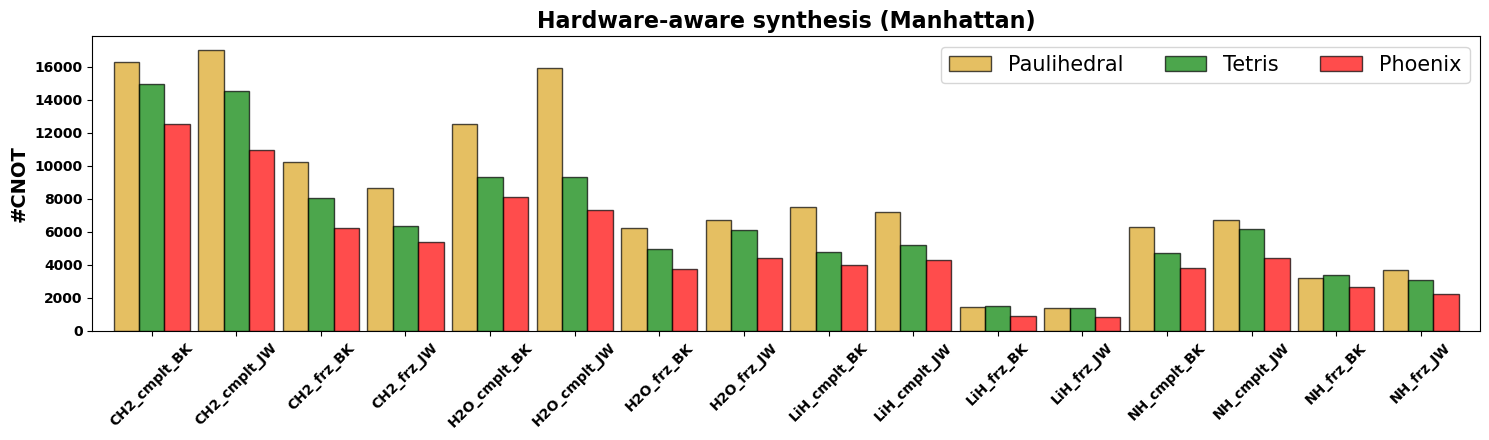

In [138]:
# num_2q_gates
plt.figure(figsize=(15, 4.5))
width = 0.3
# plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(manhattan)'], width=width, label='TKet', edgecolor='gray')

plt.bar(np.arange(num_programs) - width, result_paulihedral['num_2q_gates(manhattan)'], width=width, label='Paulihedral', edgecolor='black', color='goldenrod', alpha=0.7)
plt.bar(np.arange(num_programs), result_tetris['num_2q_gates(manhattan)'], width=width, label='Tetris', edgecolor='black', color='green', alpha=0.7)
plt.bar(np.arange(num_programs) + width, result_phoenix['num_2q_gates(manhattan)'], width=width, label='Phoenix', edgecolor='black', color='red', alpha=0.7)

plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=15, loc='upper right', ncol=3)
plt.title('Hardware-aware synthesis (Manhattan)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [134]:
print('optimization rate (Paulihedral as baseline)', geometric_mean(result_phoenix['num_2q_gates(manhattan)'] / result_paulihedral['num_2q_gates(manhattan)']).round(4))
print('optimization rate (Tetris as baseline)', geometric_mean(result_phoenix['num_2q_gates(manhattan)'] / result_tetris['num_2q_gates']).round(4))

optimization rate (Paulihedral as baseline) 0.6263
optimization rate (Tetris as baseline) 0.549


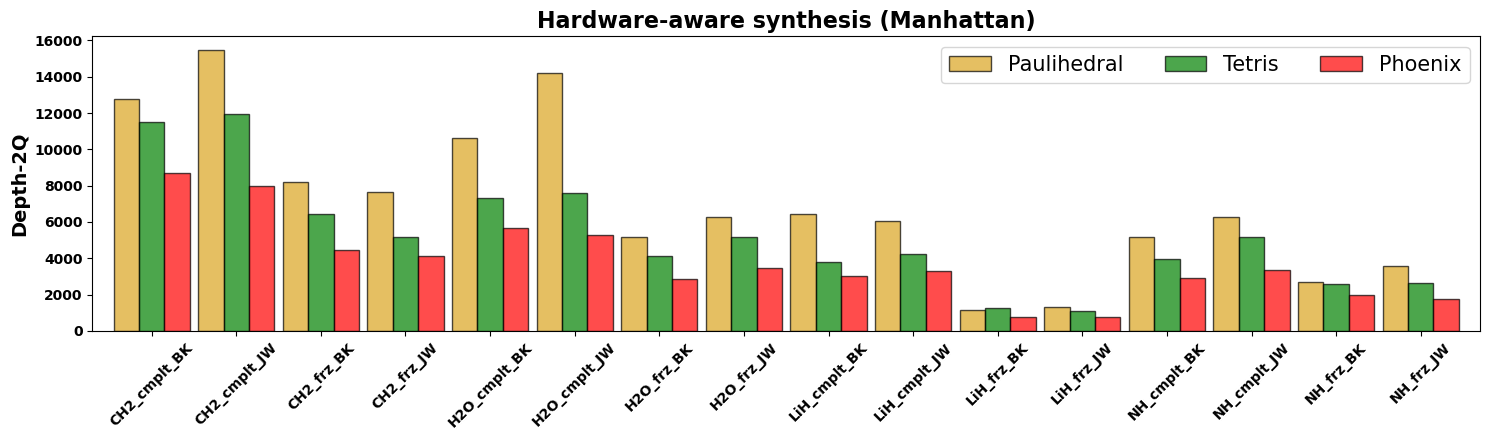

In [142]:
# depth_2q
plt.figure(figsize=(15, 4.5))
width = 0.3
# plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(manhattan)'], width=width, label='TKet')
plt.bar(np.arange(num_programs) - width, result_paulihedral['depth_2q(manhattan)'], width=width, label='Paulihedral', edgecolor='black', color='goldenrod', alpha=0.7)
plt.bar(np.arange(num_programs), result_tetris['depth_2q(manhattan)'], width=width, label='Tetris', edgecolor='black', color='green', alpha=0.7)
plt.bar(np.arange(num_programs) + width, result_phoenix['depth_2q(manhattan)'], width=width, label='Phoenix', edgecolor='black', color='red', alpha=0.7)

plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=15, loc='upper right', ncol=3)
plt.title('Hardware-aware synthesis (Manhattan)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [135]:
print('optimization rate (Paulihedral as baseline)', geometric_mean(result_phoenix['depth_2q(manhattan)'] / result_paulihedral['depth_2q(manhattan)']).round(4))
print('optimization rate (Tetris as baseline)', geometric_mean(result_phoenix['depth_2q(manhattan)'] / result_tetris['depth_2q']).round(4))

optimization rate (Paulihedral as baseline) 0.5492
optimization rate (Tetris as baseline) 0.4299


### Sycamore

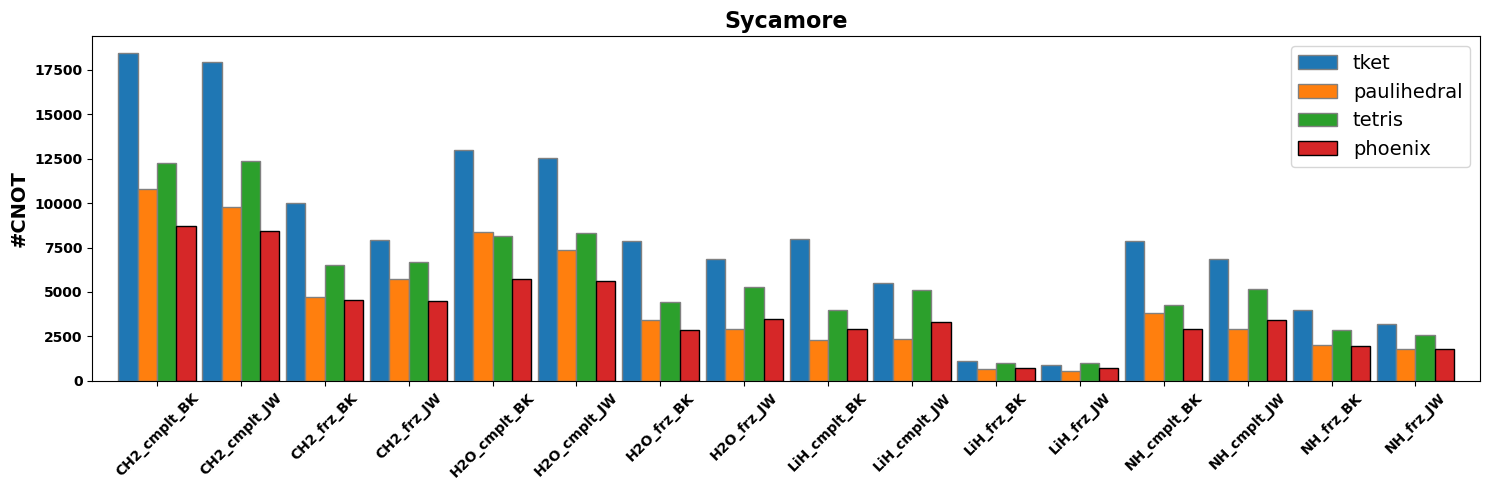

In [ ]:
# num_2q_gates
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(sycamore)'], width=width, label='TKet', edgecolor='gray')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(sycamore)'], width=width, label='Paulihedral', edgecolor='gray')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(sycamore)'], width=width, label='Tetris', edgecolor='gray')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(sycamore)'], width=width, label='Phoenix', edgecolor='black')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Sycamore', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

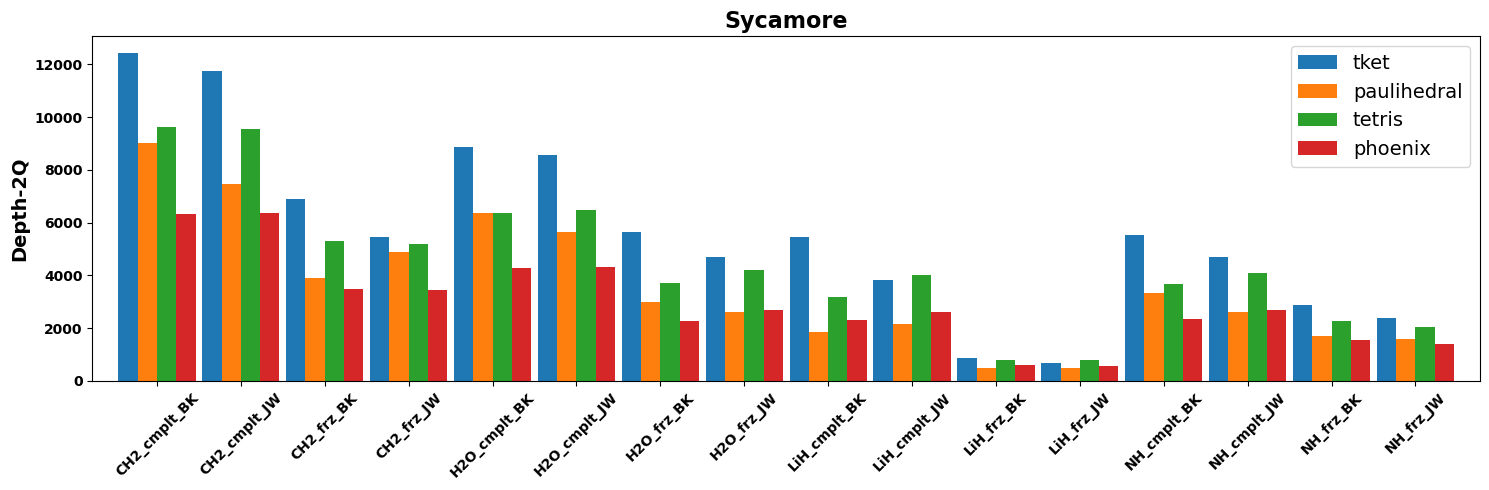

In [ ]:
# depth_2q
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(sycamore)'], width=width, label='TKet')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(sycamore)'], width=width, label='Paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(sycamore)'], width=width, label='Tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(sycamore)'], width=width, label='Phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Sycamore', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [93]:
result_tetris['num_2q_gates(sycamore)']

0      9841
1     10448
2      9522
3      5731
4      5429
5      4861
6      6887
7      6994
8      6645
9      3988
10     4239
11     4244
12     3586
13     4263
14     4110
15      999
16      880
17     1004
18     3988
19     4239
20     4244
21     2621
22     2302
23     2344
Name: num_2q_gates(sycamore), dtype: int64

In [94]:
['num_2q_gates(sycamore)']

0      9841
1     10448
2      9522
3      5731
4      5429
5      4861
6      6887
7      6994
8      6645
9      3988
10     4239
11     4244
12     3586
13     4263
14     4110
15      999
16      880
17     1004
18     3988
19     4239
20     4244
21     2621
22     2302
23     2344
Name: num_2q_gates(sycamore), dtype: int64